In [1]:
%load_ext autoreload
%autoreload 2

# An inverse problem of the Navier-Stokes equation

Benchmark on the Inverse problem for the Navier-Stokes system as proposed in DeepXDE documentation: https://github.com/lululxvi/deepxde/blob/master/examples/pinn_inverse/Navier_Stokes_inverse.py.


In [2]:
import numpy as np
from scipy.io import loadmat

# from PINNACLE
DEFAULT_NUM_DOMAIN_POINTS = 700
DEFAULT_NUM_BOUNDARY_POINTS = 200
DEFAULT_NUM_INITIAL_POINTS = 100

# Load training data
def load_training_data(num):
    data = loadmat("cylinder_nektar_wake.mat")
    U_star = data["U_star"]  # N x 2 x T
    P_star = data["p_star"]  # N x T
    t_star = data["t"]  # T x 1
    X_star = data["X_star"]  # N x 2
    N = X_star.shape[0]
    T = t_star.shape[0]
    # Rearrange Data
    XX = np.tile(X_star[:, 0:1], (1, T))  # N x T
    YY = np.tile(X_star[:, 1:2], (1, T))  # N x T
    TT = np.tile(t_star, (1, N)).T  # N x T
    UU = U_star[:, 0, :]  # N x T
    VV = U_star[:, 1, :]  # N x T
    PP = P_star  # N x T
    x = XX.flatten()[:, None]  # NT x 1
    y = YY.flatten()[:, None]  # NT x 1
    t = TT.flatten()[:, None]  # NT x 1
    u = UU.flatten()[:, None]  # NT x 1
    v = VV.flatten()[:, None]  # NT x 1
    p = PP.flatten()[:, None]  # NT x 1
    # training domain: X × Y = [1, 8] × [−2, 2] and T = [0, 7]
    data1 = np.concatenate([x, y, t, u, v, p], 1)
    data2 = data1[:, :][data1[:, 2] <= 7]
    data3 = data2[:, :][data2[:, 0] >= 1]
    data4 = data3[:, :][data3[:, 0] <= 8]
    data5 = data4[:, :][data4[:, 1] >= -2]
    data_domain = data5[:, :][data5[:, 1] <= 2]
    # choose number of training points: num =7000
    idx = np.random.choice(data_domain.shape[0], num, replace=False)
    x_train = data_domain[idx, 0:1]
    y_train = data_domain[idx, 1:2]
    t_train = data_domain[idx, 2:3]
    u_train = data_domain[idx, 3:4]
    v_train = data_domain[idx, 4:5]
    p_train = data_domain[idx, 5:6]
    return [x_train, y_train, t_train, u_train, v_train, p_train]

C1_init = 0.0
C2_init = 0.0

## DeepXDE


We use the tensorflow backend as JAX backend is not available

In [3]:
seed = 1

Compiling model...
'compile' took 0.003771 s

Training model...



I0000 00:00:1732716395.537300   55364 service.cc:148] XLA service 0xd31c700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732716395.537324   55364 service.cc:156]   StreamExecutor device (0): NVIDIA T600 Laptop GPU, Compute Capability 7.5
2024-11-27 15:06:35.568262: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732716395.762617   55364 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-27 15:06:36.495321: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.3.107. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
I0000 00:00:1732716396.

Step      Train loss                                            Test loss                                             Test metric
0         [7.44e-03, 4.65e-03, 7.73e-03, 1.24e+00, 9.85e-02]    [7.44e-03, 4.65e-03, 7.73e-03, 1.24e+00, 9.85e-02]    []  
1000      [9.23e-04, 1.06e-03, 1.12e-03, 4.55e-03, 8.62e-03]    [9.23e-04, 1.06e-03, 1.12e-03, 4.55e-03, 8.62e-03]    []  
2000      [3.18e-04, 6.57e-04, 5.69e-04, 1.56e-03, 2.14e-03]    [3.18e-04, 6.57e-04, 5.69e-04, 1.56e-03, 2.14e-03]    []  
3000      [2.57e-04, 4.83e-04, 3.85e-04, 9.80e-04, 1.34e-03]    [2.57e-04, 4.83e-04, 3.85e-04, 9.80e-04, 1.34e-03]    []  
4000      [3.22e-04, 5.19e-04, 3.18e-04, 7.56e-04, 1.38e-03]    [3.22e-04, 5.19e-04, 3.18e-04, 7.56e-04, 1.38e-03]    []  
5000      [1.61e-04, 2.68e-04, 2.28e-04, 5.26e-04, 7.13e-04]    [1.61e-04, 2.68e-04, 2.28e-04, 5.26e-04, 7.13e-04]    []  
6000      [1.79e-04, 2.94e-04, 2.89e-04, 7.17e-04, 6.32e-04]    [1.79e-04, 2.94e-04, 2.89e-04, 7.17e-04, 6.32e-04]    []  
7000     

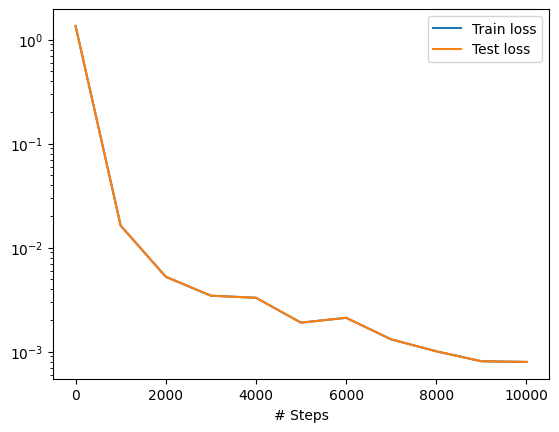

Compiling model...
'compile' took 0.002588 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
10000     [7.81e-05, 1.41e-04, 1.37e-04, 2.65e-04, 1.73e-04]    [7.81e-05, 1.41e-04, 1.37e-04, 2.65e-04, 1.73e-04]    []  
11000     [6.25e-05, 1.00e-04, 9.72e-05, 1.40e-04, 1.28e-04]    [6.25e-05, 1.00e-04, 9.72e-05, 1.40e-04, 1.28e-04]    []  
12000     [5.40e-05, 8.90e-05, 8.57e-05, 1.22e-04, 1.05e-04]    [5.40e-05, 8.90e-05, 8.57e-05, 1.22e-04, 1.05e-04]    []  
13000     [4.71e-05, 7.94e-05, 7.67e-05, 1.00e-04, 8.87e-05]    [4.71e-05, 7.94e-05, 7.67e-05, 1.00e-04, 8.87e-05]    []  
14000     [4.28e-05, 7.14e-05, 6.94e-05, 8.98e-05, 7.77e-05]    [4.28e-05, 7.14e-05, 6.94e-05, 8.98e-05, 7.77e-05]    []  
15000     [3.92e-05, 6.49e-05, 6.35e-05, 7.58e-05, 6.91e-05]    [3.92e-05, 6.49e-05, 6.35e-05, 7.58e-05, 6.91e-05]    []  
16000     [3.67e-05, 5.97e-05, 5.86e-05, 6.73e-05, 6.35e-05]    [3.

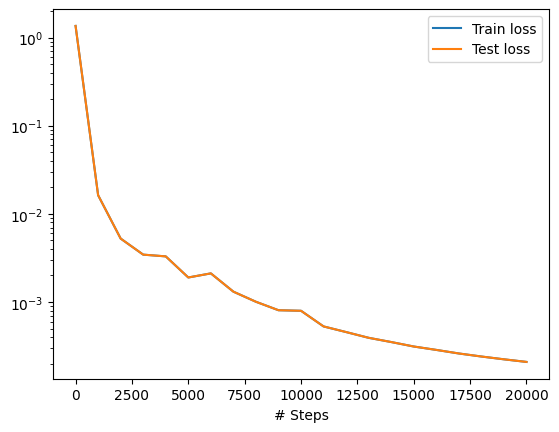

Mean residual: 0.0043853903


In [11]:
import os
os.environ["DDE_BACKEND"]="tensorflow"
import deepxde as dde

# Determinism may reduce performance in DeepXDE (see doc) but needs to
# be set for a fair comparison with Jinns
# https://deepxde.readthedocs.io/en/stable/modules/deepxde.html#deepxde.config.set_random_seed
dde.config.set_random_seed(seed)

C1 = dde.Variable(C1_init)
C2 = dde.Variable(C2_init)

# Define Navier Stokes Equations (Time-dependent PDEs)
def Navier_Stokes_Equation(x, y):
    u = y[:, 0:1]
    v = y[:, 1:2]
    p = y[:, 2:3]
    du_x = dde.grad.jacobian(y, x, i=0, j=0)
    du_y = dde.grad.jacobian(y, x, i=0, j=1)
    du_t = dde.grad.jacobian(y, x, i=0, j=2)
    dv_x = dde.grad.jacobian(y, x, i=1, j=0)
    dv_y = dde.grad.jacobian(y, x, i=1, j=1)
    dv_t = dde.grad.jacobian(y, x, i=1, j=2)
    dp_x = dde.grad.jacobian(y, x, i=2, j=0)
    dp_y = dde.grad.jacobian(y, x, i=2, j=1)
    du_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    du_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)
    dv_xx = dde.grad.hessian(y, x, component=1, i=0, j=0)
    dv_yy = dde.grad.hessian(y, x, component=1, i=1, j=1)
    continuity = du_x + dv_y
    x_momentum = du_t + C1 * (u * du_x + v * du_y) + dp_x - C2 * (du_xx + du_yy)
    y_momentum = dv_t + C1 * (u * dv_x + v * dv_y) + dp_y - C2 * (dv_xx + dv_yy)
    return [continuity, x_momentum, y_momentum]

# Define Spatio-temporal domain
# Rectangular
Lx_min, Lx_max = 1.0, 8.0
Ly_min, Ly_max = -2.0, 2.0
# Spatial domain: X × Y = [1, 8] × [−2, 2]
space_domain = dde.geometry.Rectangle([Lx_min, Ly_min], [Lx_max, Ly_max])
# Time domain: T = [0, 7]
time_domain = dde.geometry.TimeDomain(0, 7)
# Spatio-temporal domain
geomtime = dde.geometry.GeometryXTime(space_domain, time_domain)

# Get the training data: num = 7000
[ob_x, ob_y, ob_t, ob_u, ob_v, ob_p] = load_training_data(num=7000)
ob_xyt = np.hstack((ob_x, ob_y, ob_t))
observe_u = dde.icbc.PointSetBC(ob_xyt, ob_u, component=0)
observe_v = dde.icbc.PointSetBC(ob_xyt, ob_v, component=1)

# Training datasets and Loss
data = dde.data.TimePDE(
    geomtime,
    Navier_Stokes_Equation,
    [observe_u, observe_v],
    num_domain=DEFAULT_NUM_DOMAIN_POINTS,
    num_boundary=DEFAULT_NUM_BOUNDARY_POINTS,
    num_initial=DEFAULT_NUM_INITIAL_POINTS,
    anchors=ob_xyt,
)

# Neural Network setup
layer_size = [3] + [50] * 6 + [3]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)
model = dde.Model(data, net)

# callbacks for storing results
fnamevar = "variables.dat"
variable = dde.callbacks.VariableValue([C1, C2], period=100, filename=fnamevar)

# Compile, train and save model
model.compile("adam", lr=1e-3, external_trainable_variables=[C1, C2])
loss_history, train_state = model.train(
    iterations=10000, callbacks=[variable], display_every=1000, disregard_previous_best=True
)
dde.saveplot(loss_history, train_state, issave=True, isplot=True)
model.compile("adam", lr=1e-4, external_trainable_variables=[C1, C2])
loss_history, train_state = model.train(
    iterations=10000, callbacks=[variable], display_every=1000, disregard_previous_best=True
)
dde.saveplot(loss_history, train_state, issave=True, isplot=True)
# model.save(save_path = "./NS_inverse_model/model")
f = model.predict(ob_xyt, operator=Navier_Stokes_Equation)
print("Mean residual:", np.mean(np.absolute(f)))

## With Jinns

In [4]:
import jax
import equinox as eqx
import jinns
import jax.numpy as jnp
from jax import grad, vmap, random
import optax
import time
import matplotlib.pyplot as plt

key = random.PRNGKey(seed)

2024-11-27 15:38:23.063760: W external/xla/xla/service/gpu/nvptx_compiler.cc:893] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.3.107. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [5]:
eqx_list = (
    (eqx.nn.Linear, 3, 50),
    (jax.nn.tanh,),
    (eqx.nn.Linear, 50, 50),
    (jax.nn.tanh,),
    (eqx.nn.Linear, 50, 50),
    (jax.nn.tanh,),
    (eqx.nn.Linear, 50, 50),
    (jax.nn.tanh,),
    (eqx.nn.Linear, 50, 50),
    (jax.nn.tanh,),
    (eqx.nn.Linear, 50, 50),
    (jax.nn.tanh,),
    (eqx.nn.Linear, 50, 3)
)
key, subkey = random.split(key)
u_pinn, init_nn_params_pinn = jinns.utils.create_PINN(subkey, eqx_list, "nonstatio_PDE", 2)

In [6]:
n = DEFAULT_NUM_DOMAIN_POINTS
ni = DEFAULT_NUM_INITIAL_POINTS
nb = DEFAULT_NUM_BOUNDARY_POINTS
dim = 2
xmin = 1
xmax = 8
ymin= -2
ymax= 2
tmin = 0
tmax = 7
method = "grid" # equals "uniform" in deepXDE, while "uniform" in jinns equals "pseudo" in deepXDE

train_data = jinns.data.CubicMeshPDENonStatio(
    key=subkey,
    n=n,
    nb=nb,
    ni=ni,
    dim=dim,
    min_pts=(xmin,ymin),
    max_pts=(xmax,ymax),
    tmin=tmin,
    tmax=tmax,
    method=method,
)

/home/hugo/Documents/recherche/pinn/gitlab/jinns/data/_DataGenerators.py:434: UserWarning: Grid sampling is requested in dimension 2 with a non perfect square dataset size (self.n = 700). Modifying self.n to self.n = 676.
  warnings.warn(


In [7]:
# Init parameters for NN and equation
init_params_pinn = jinns.parameters.Params(
    nn_params=init_nn_params_pinn,
    eq_params={
        "C1":jnp.array(C1_init),
        "C2":jnp.array(C2_init)
    }
)

In [8]:
from jinns.loss import PDENonStatio

class NavierStokes2D(PDENonStatio):
    def equation(self, t_x, u_p, params):
        u_ = lambda t_x, params: u_p(t_x, params)[0:2]
        p_ = lambda t_x, params: u_p(t_x, params)[2]

        du_dt = jax.jacrev(u_)(t_x, params)[:, 0]
        ux = lambda t_x, params: u_(t_x, params)[0]
        uy = lambda t_x, params: u_(t_x, params)[1]
    
        dux_dx = lambda t_x: grad(ux)(t_x, params)[1]
        dux_dy = lambda t_x: grad(ux)(t_x, params)[2]
    
        duy_dx = lambda t_x: grad(uy)(t_x, params)[1]
        duy_dy = lambda t_x: grad(uy)(t_x, params)[2]

        dp_dx = lambda t_x: grad(p_)(t_x, params)[1]
        dp_dy = lambda t_x: grad(p_)(t_x, params)[2]

        return jnp.array(
            [
                du_dt[0]
                    + params.eq_params["C1"] * (ux(t_x, params) * dux_dx(t_x) + uy(t_x, params) * dux_dy(t_x)) + dp_dx(t_x)
                    - params.eq_params["C2"] * jinns.loss.laplacian_rev(t_x, lambda t_x, params: ux(t_x, params), params, eq_type="nonstatio_PDE"),
                du_dt[1] 
                    + params.eq_params["C1"] * (ux(t_x, params) * duy_dx(t_x) + uy(t_x, params) * duy_dy(t_x)) + dp_dy(t_x)
                    - params.eq_params["C2"] * jinns.loss.laplacian_rev(t_x, lambda t_x, params: uy(t_x, params), params, eq_type="nonstatio_PDE"),
                dux_dx(t_x) + duy_dy(t_x),
            ]
        )
ns_loss = NavierStokes2D()

In [9]:
loss_weights = jinns.loss.LossWeightsPDENonStatio(
    dyn_loss=1, initial_condition=0, boundary_loss=0, observations=1
)

In [10]:
key, subkey = jax.random.split(key)

[ob_x, ob_y, ob_t, ob_u, ob_v, ob_p] = load_training_data(num=7000)
ob_t_x = np.hstack((ob_t, ob_x, ob_y))

obs_data = jinns.data.DataGeneratorObservations(
    subkey,
    obs_batch_size=None,
    observed_pinn_in=ob_t_x,
    observed_values=np.hstack((ob_u, ob_v))
)

In [11]:
derivative_keys = jinns.parameters.DerivativeKeysPDENonStatio.from_str(
    dyn_loss=jinns.parameters.Params(
        nn_params = True,
        eq_params = {
            'C1':True,
            'C2':True
        }
    ),
    boundary_loss="nn_params",
    initial_condition="nn_params",
    observations="nn_params",
    params=init_params_pinn
)

In [12]:
loss_pinn = jinns.loss.LossPDENonStatio(
    u=u_pinn,
    loss_weights=loss_weights,
    dynamic_loss=ns_loss,
    derivative_keys=derivative_keys,
    omega_boundary_fun=None,
    omega_boundary_condition=None,
    initial_condition_fun=None,
    params=init_params_pinn,
    obs_slice=jnp.s_[0:2]
)

/home/hugo/Documents/recherche/pinn/gitlab/jinns/loss/_LossPDE.py:177: UserWarning: Missing boundary function or no boundary condition.Boundary function is thus ignored.
  warnings.warn(
/home/hugo/Documents/recherche/pinn/gitlab/jinns/loss/_LossPDE.py:592: UserWarning: Initial condition wasn't provided. Be sure to cover for thatcase (e.g by. hardcoding it into the PINN output).
  warnings.warn(


In [13]:
# Training loop in Jinns
params_pinn = init_params_pinn
tx = optax.adam(learning_rate=1e-3)
n_iter = 10000

In [14]:
params_pinn, total_loss_list_pinn, loss_by_term_dict_pinn, _, _, opt_state, stored_params, _, _ = jinns.solve(
    init_params=params_pinn,
    data=train_data,
    optimizer=tx,
    loss=loss_pinn,
    n_iter=n_iter,
    obs_data=obs_data,
    tracked_params = jinns.parameters.Params(
        eq_params={"C1":True, "C2":True}
    ),
    verbose=True
)


Compilation took
 8.522966861724854 

[train] Iteration 0: loss value = 1.2740693092346191
[train] Iteration 1000: loss value = 0.020218467339873314
[train] Iteration 2000: loss value = 0.007126626558601856
[train] Iteration 3000: loss value = 0.003993477206677198
[train] Iteration 4000: loss value = 0.0028624949045479298
[train] Iteration 5000: loss value = 0.002610136056318879
[train] Iteration 6000: loss value = 0.0016277863178402185
[train] Iteration 7000: loss value = 0.0016890955157577991
[train] Iteration 8000: loss value = 0.0010989182628691196
[train] Iteration 9000: loss value = 0.0008628913783468306

Stopping main optimization loop, cause: max iteration is reached

Training took
 86.84158301353455 


Final iteration 10000: train loss value = 0.0006462103920057416


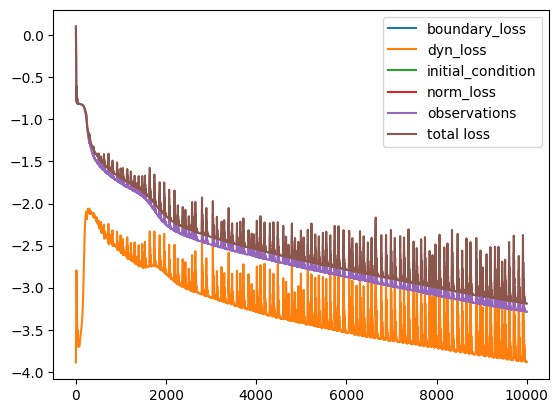

In [15]:
for loss_name, loss_values in loss_by_term_dict_pinn.items():
    plt.plot(jnp.log10(loss_values), label=loss_name)
plt.plot(jnp.log10(total_loss_list_pinn), label="total loss")
plt.legend()
plt.show()

In [16]:
tx = optax.adam(learning_rate=1e-4)
n_iter = 10000

In [18]:
params_pinn, total_loss_list_pinn, loss_by_term_dict_pinn, _, _, _, stored_params, _, _ = jinns.solve(
    init_params=params_pinn,
    data=train_data,
    optimizer=tx,
    loss=loss_pinn,
    n_iter=n_iter,
    obs_data=obs_data,
    opt_state=opt_state,
    tracked_params = jinns.parameters.Params(
        eq_params={"C1":True, "C2":True}
    ),
    verbose=True
)


Compilation took
 4.21279501914978 

[train] Iteration 0: loss value = 0.0006461949087679386
[train] Iteration 1000: loss value = 0.0005754709709435701
[train] Iteration 2000: loss value = 0.0004984474508091807
[train] Iteration 3000: loss value = 0.00043627448030747473
[train] Iteration 4000: loss value = 0.000388305721571669
[train] Iteration 5000: loss value = 0.000350346730556339
[train] Iteration 6000: loss value = 0.0003200628561899066
[train] Iteration 7000: loss value = 0.0002957391261588782
[train] Iteration 8000: loss value = 0.00027428637258708477
[train] Iteration 9000: loss value = 0.00025795126566663384

Stopping main optimization loop, cause: max iteration is reached

Training took
 86.66952919960022 


Final iteration 10000: train loss value = 0.00024142267648130655


## Comparisons

In [13]:
print(f"{C1_init=}, {C2_init=}")
print("According to DeepXDE, true C1 is C1=1.0 and true C2=0.01")

C1_init=0.0, C2_init=0.0
According to DeepXDE, true C1 is C1=1.0 and true C2=0.01


In [14]:
print("DeepXDE (iteration, estimated C1, estimated C2):")
with open('variables.dat') as f:
    for line in f:
        pass
    last_line = line
print(last_line)

DeepXDE (iteration, estimated C1, estimated C2):
20000 [9.99e-01, 1.09e-02]



In [19]:
print("jinns: estimated C1=", stored_params.eq_params["C1"][-1])
print("jinns: estimated C2=", stored_params.eq_params["C2"][-1])

jinns: estimated C1 0.9984968
jinns: estimated C2 0.011114675
